Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Batsal Ghimire"
COLLABORATORS = ""

---

# CS110 Pre-class Work 2.1

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2) which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et. al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


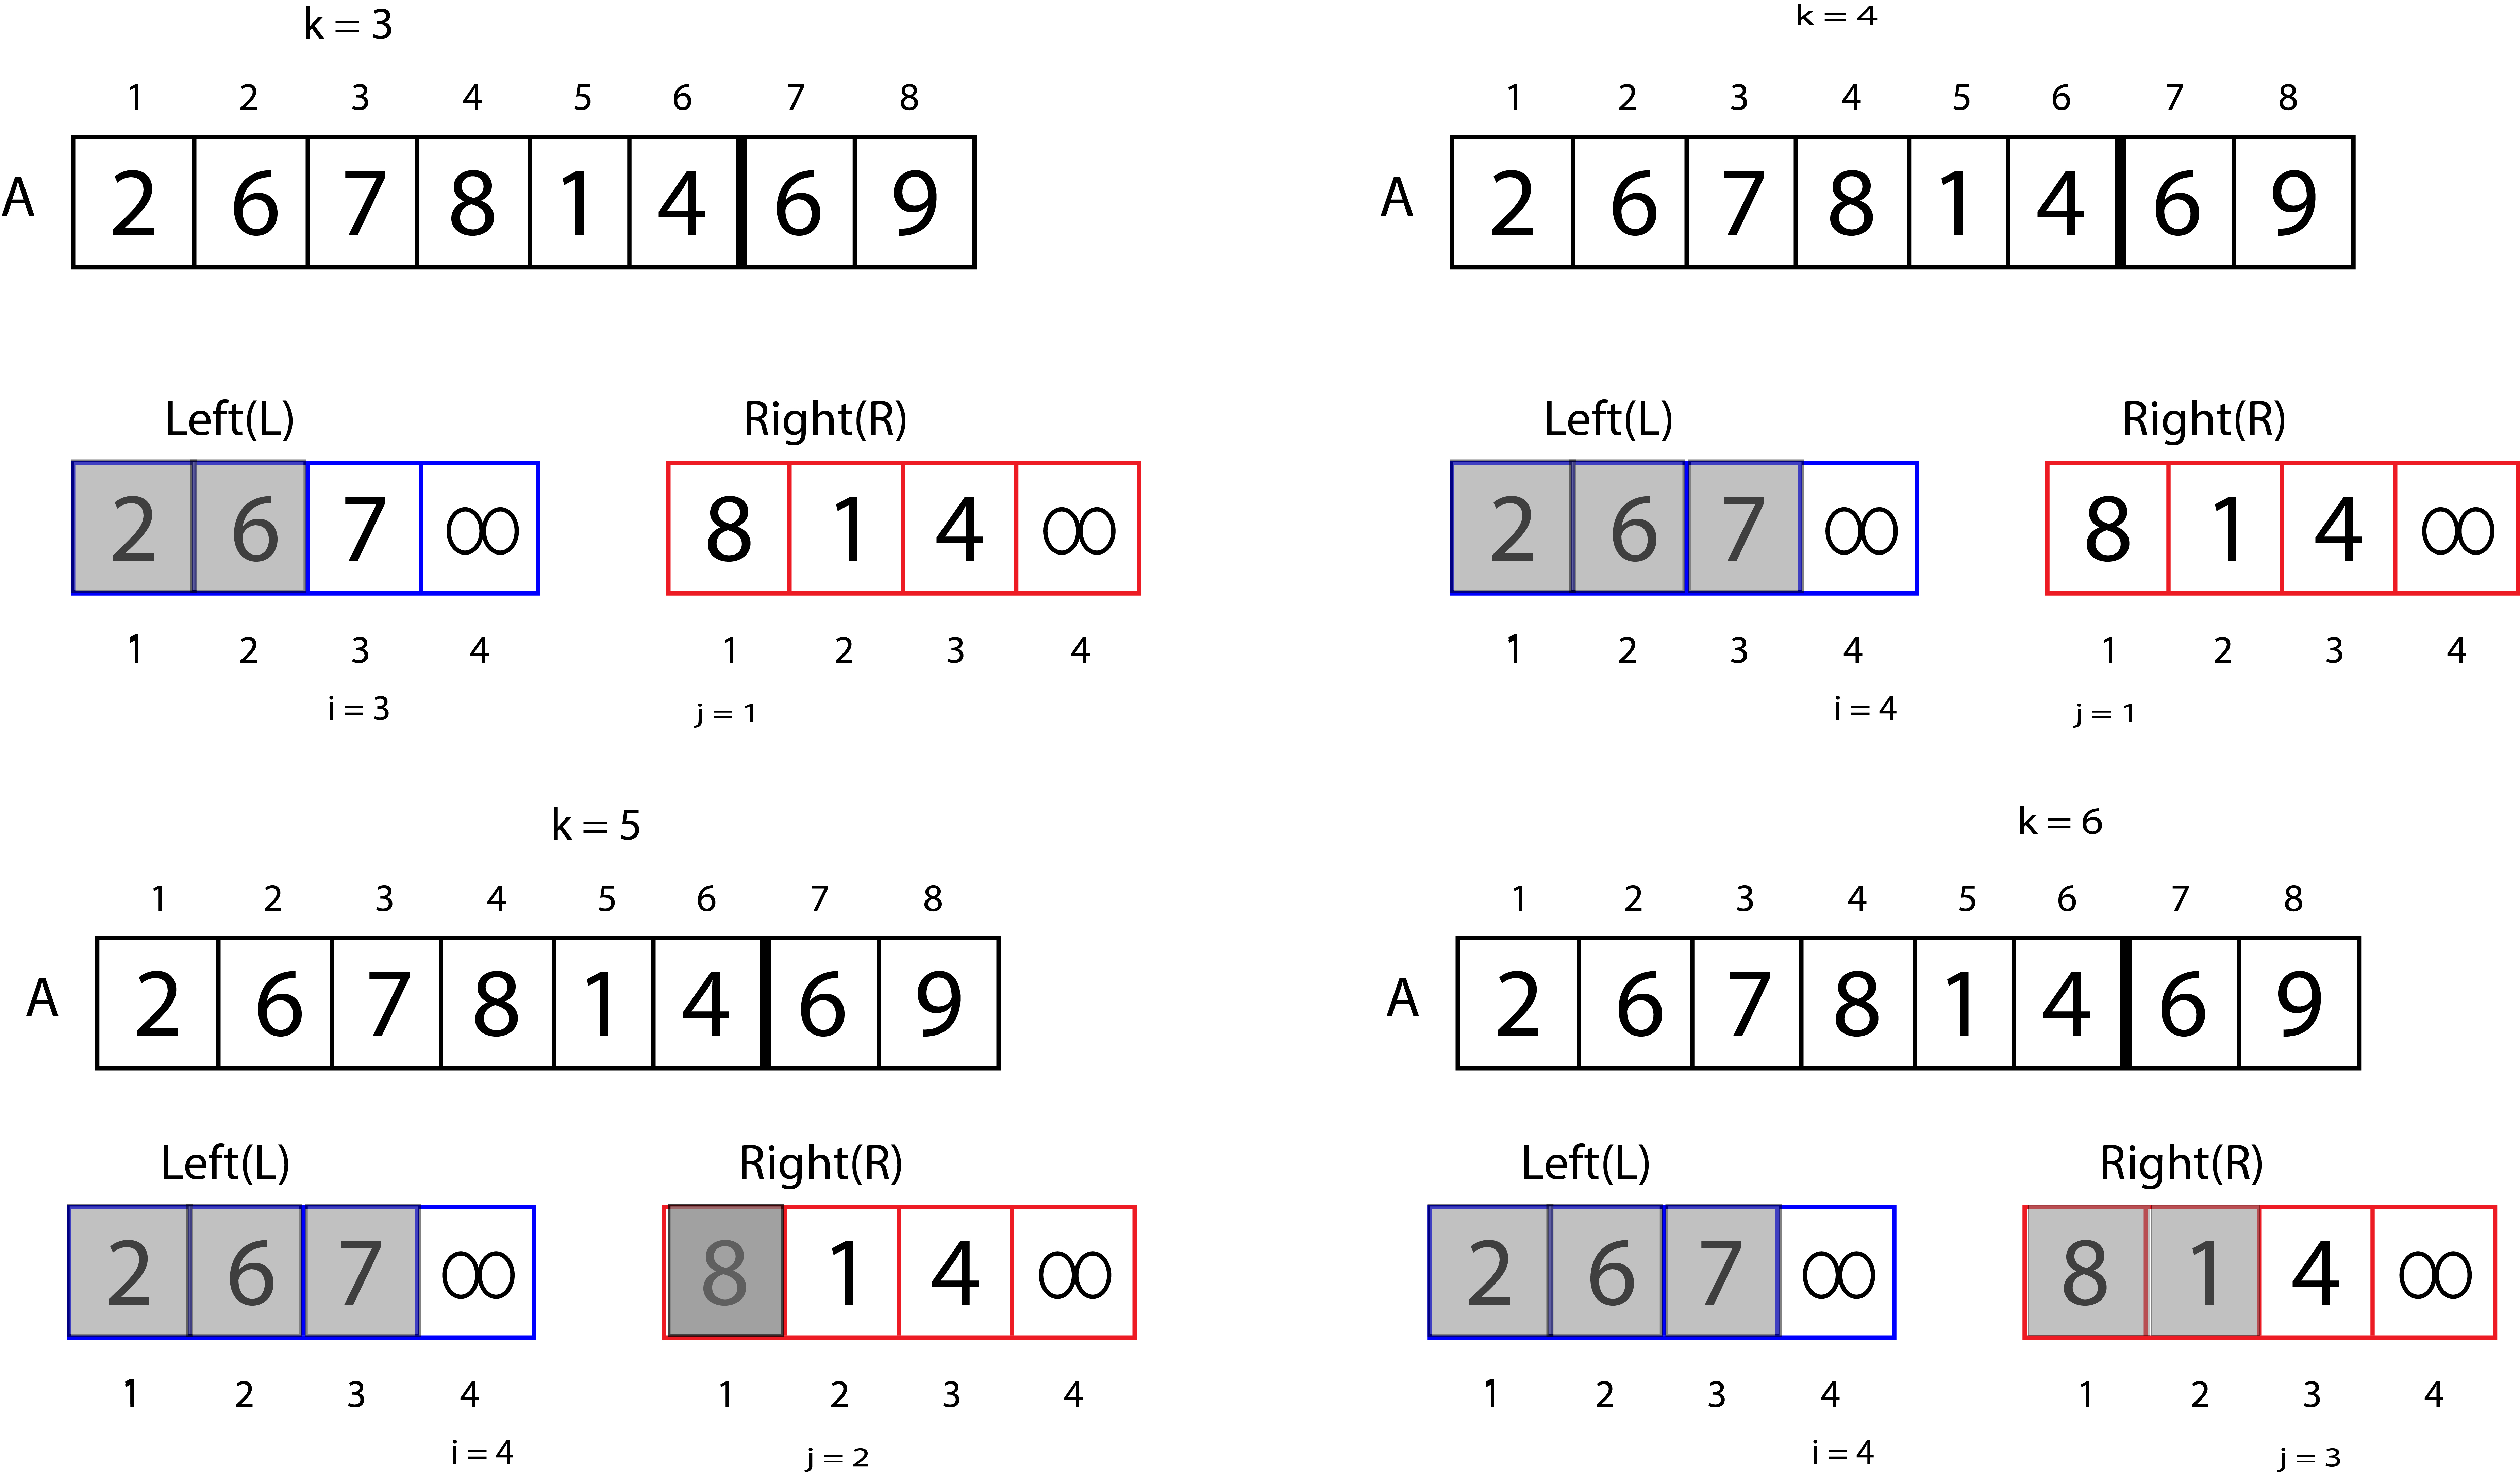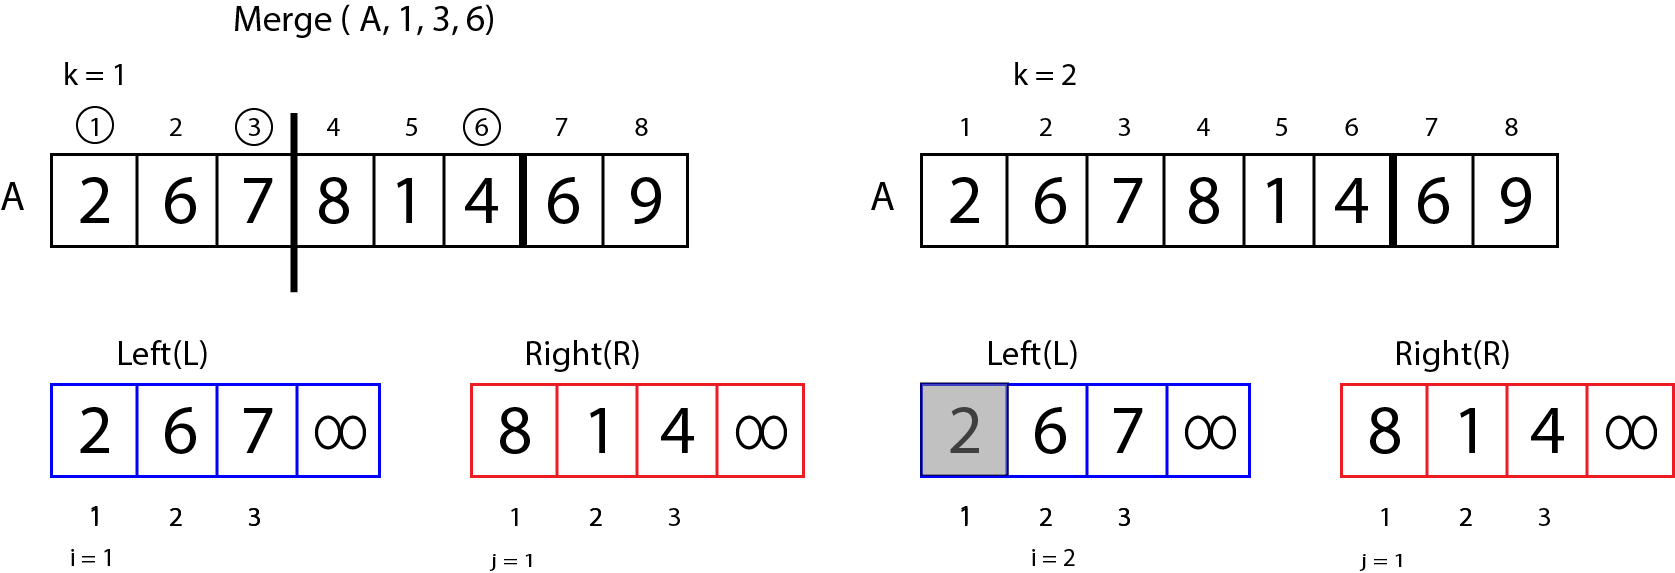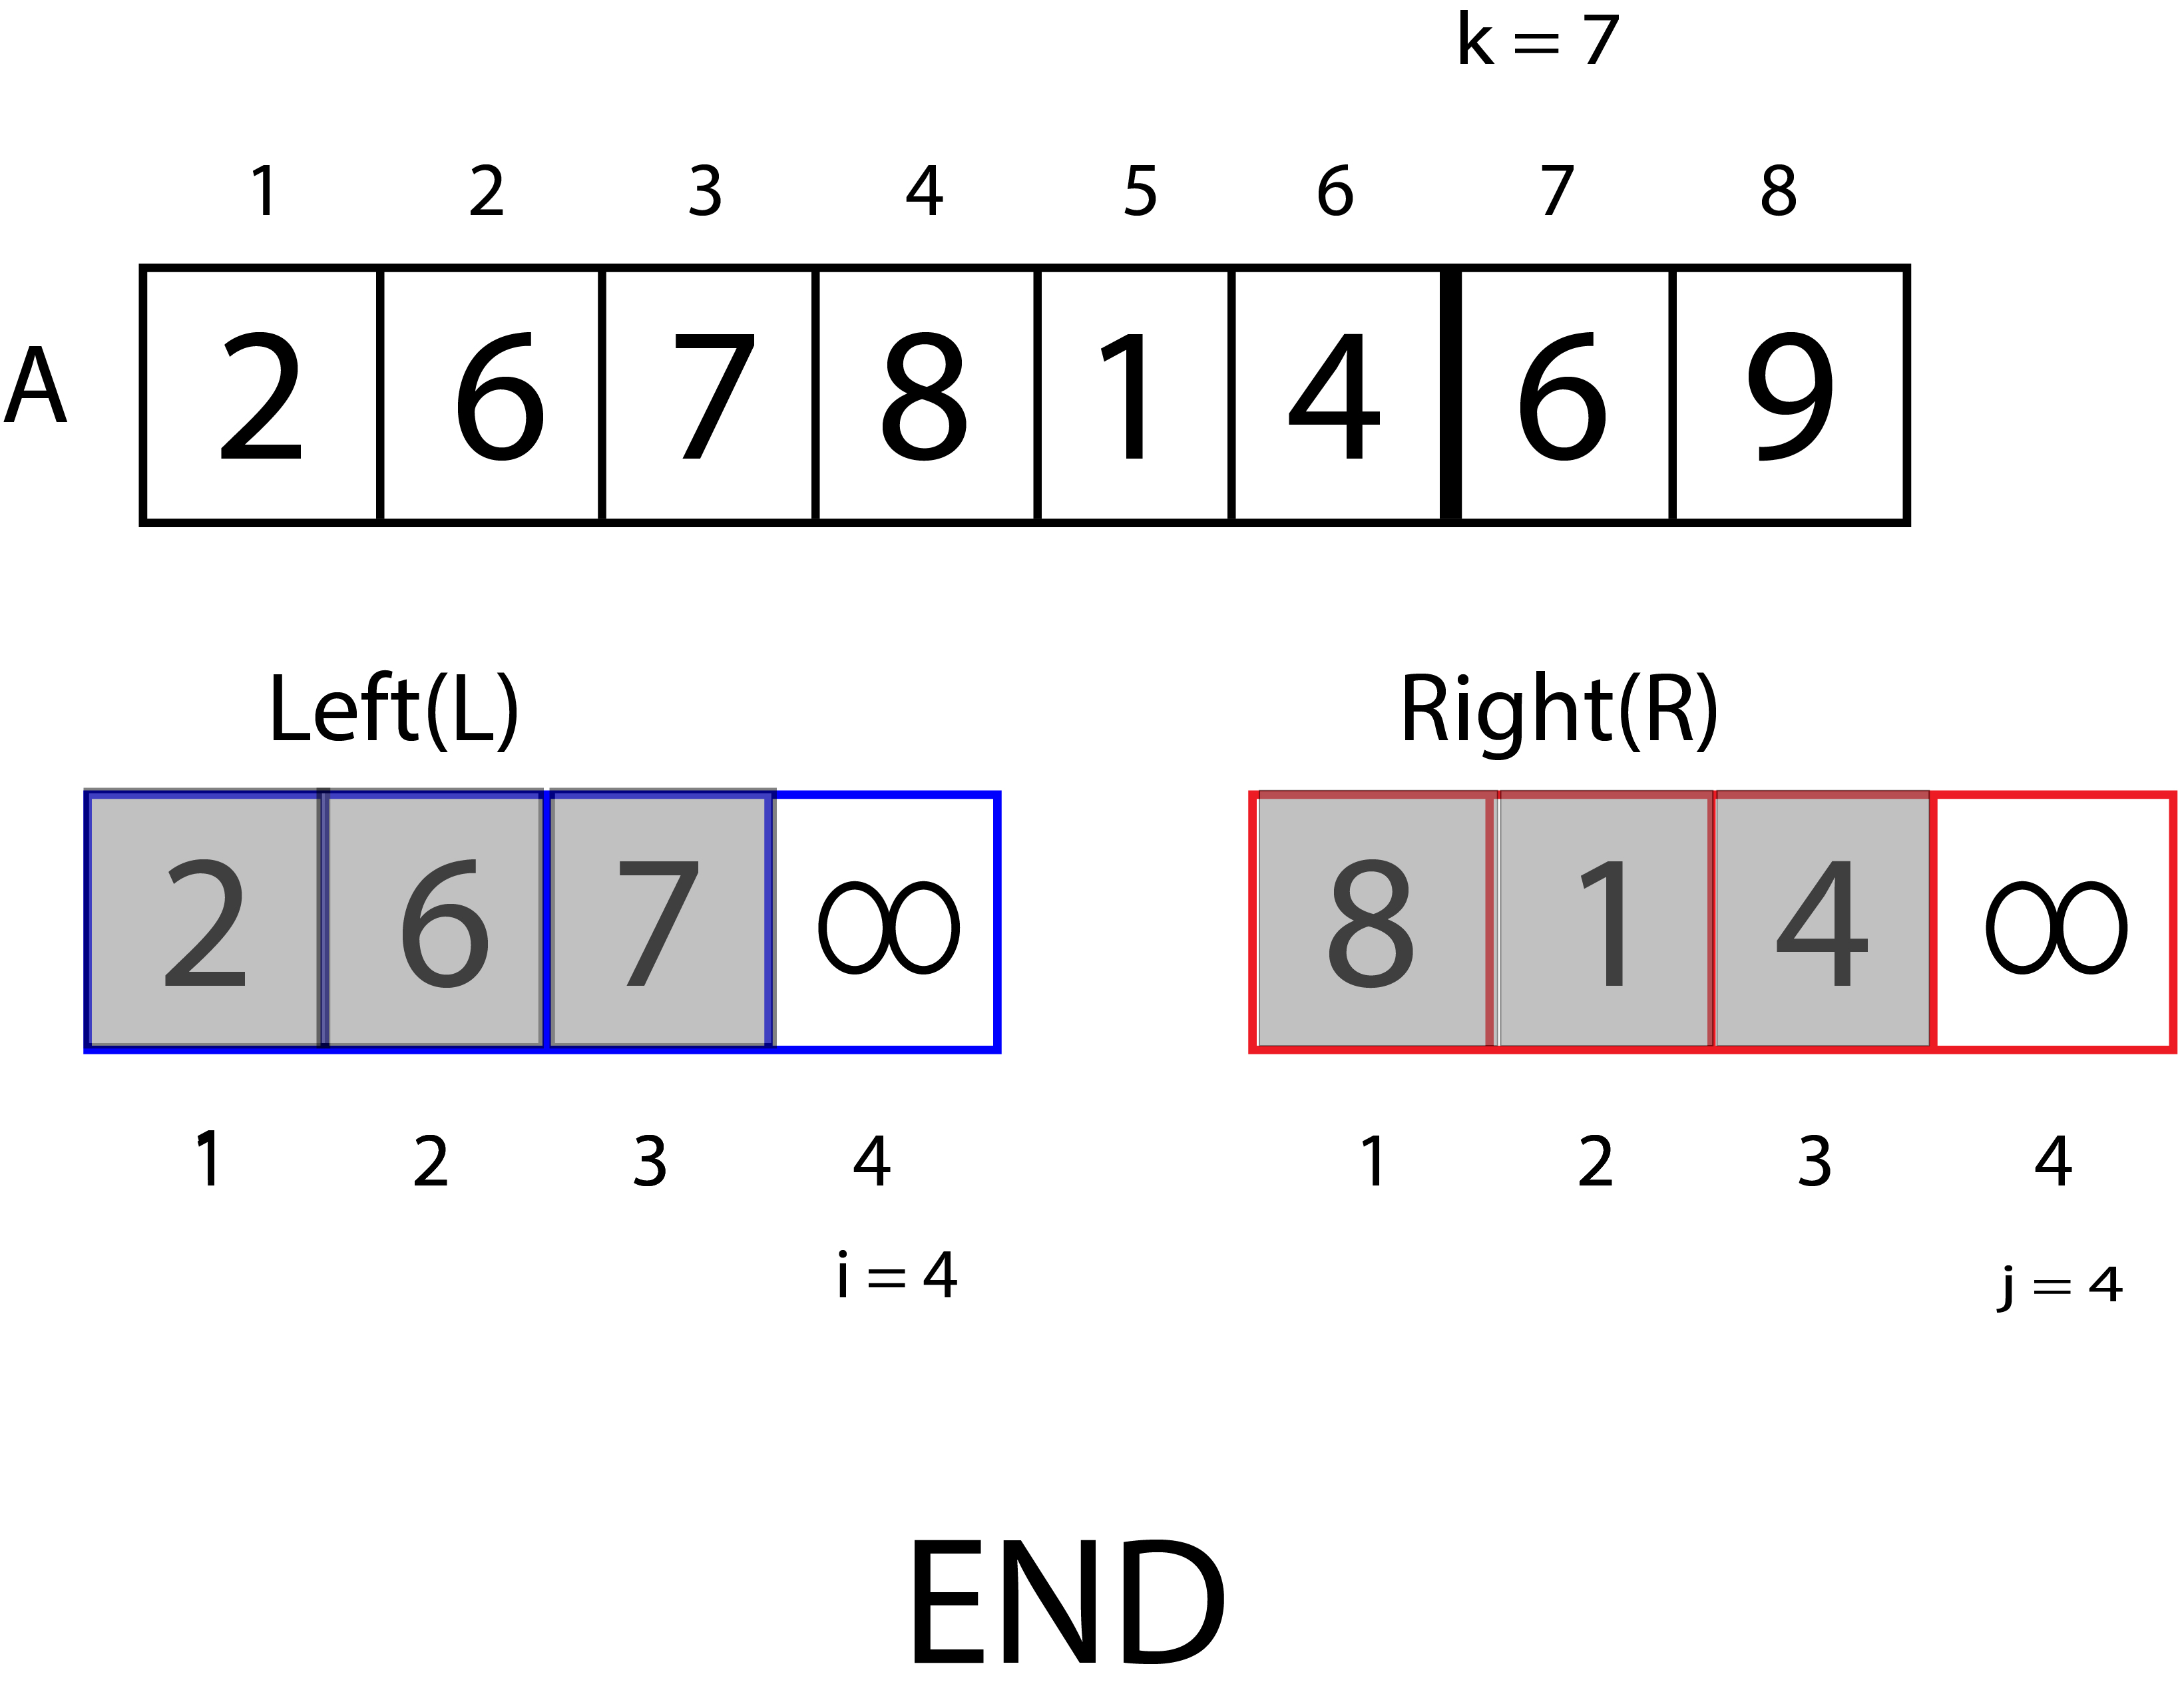

## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

To distribute the elements from the given position, we can slice the array using A[p:q+1] for the left side and similarly from A[q+1:r+1] in the right hand side. Through this, there is no need to use for loop and is more efficient in that regard.

## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

In [2]:
import math
def merge(A, p, q, r):
    # YOUR CODE HERE
    step_counter = 0
    n1 = q-p+1
    n2 = r-q
    L = A[p:q+1]
    R = A[q+1:r+1]
    L.append(math.inf)
    step_counter += 1
    R.append(math.inf)
    step_counter += 1

    i= j = 0
    for k in range (p, r+1):
        if (L[i] <= R[j]):
            A[k] = L[i]
            i += 1
            step_counter += 1
        else:
            A[k] = R[j]
            j += 1
            step_counter += 1
    return (A,step_counter)

In [3]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [4]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [5]:
def merge_sort(A,p,r):
    # YOUR CODE HERE 
    step_counter = 0
    step_counter = step_counter + 1
    if p < r:
        q = (p+r)//2
        merge_sort(A,p,q)
        step_counter = step_counter + 1
        merge_sort(A,q+1,r)
        step_counter = step_counter + 1
        merge_count = merge(A,p,q,r)
        step_counter = step_counter + merge_count[1]
    return (A,step_counter)

In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [7]:
# YOUR CODE HERE
import time
timer_start = time.time()
step_counter = 0
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    r = len(list_k)-1
    s = merge_sort(list_k, 0, r)
    step_counter = step_counter + s[1]
timer_end = time.time()
tot_time = timer_end-timer_start
print (tot_time, step_counter)

0.05983543395996094 12075


# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Using as many cells as you wish (code cells or markdown cells alike) to complete this question.


In [8]:
def bubbleSort(A):
    steps = 0
    for i in range (len (A)):
        for j in range (len(A)-1):
            if A [j] > A [j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]
            steps += 1
    return (A,steps)

bubble_sort_total_steps = 0
bubble_sort_timer_start = time.time ()
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    s = bubbleSort (list_k)
    bubble_sort_total_steps = bubble_sort_total_steps + s[1]
bubble_sort_timer_end   = time.time ()
bubble_sort_tot_time = bubble_sort_timer_end - bubble_sort_timer_start
print (bubble_sort_tot_time, bubble_sort_total_steps)

3.08081316947937 12388000


In [9]:
def selectionSort(A):
    n = len(A)
    steps = 0
    for i in range (1,n-1):
        minidx = i
        for j in range (i + 1, n):
            if A[j]< A[minidx]:
                minidx = j
            steps = steps + 1
        A[i], A[minidx] = A[minidx], A[i]
        
    return (A,steps)

selection_sort_total_steps = 0
selection_sort_timer_start = time.time ()
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    s = selectionSort (list_k)
    selection_sort_total_steps = selection_sort_total_steps + s [1]
selection_sort_timer_end   = time.time ()
selection_tot_time = selection_sort_timer_end - selection_sort_timer_start
print (selection_tot_time, selection_sort_total_steps)

0.7140889167785645 6182015


In [10]:
def insertionSort(A):
    steps = 0
    for j in range(1, len(A)): # The bug was here, it is because the j is starting from 0 not 1
        key = A[j]
        i= j-1
        while i >= 0 and A[i]>key:
            A[i+1] = A[i]
            i -= 1
            A[i+1] = key
            steps = steps + 1
    return (A, steps)

insertion_total_steps = 0
insertion_timer_start = time.time ()
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    s = insertionSort (list_k)
    insertion_total_steps = insertion_total_steps + s[1]
insertion_timer_end   = time.time ()
insertion_tot_time = insertion_timer_end - insertion_timer_start
print(insertion_tot_time, insertion_total_steps)

2.0235517024993896 6194000


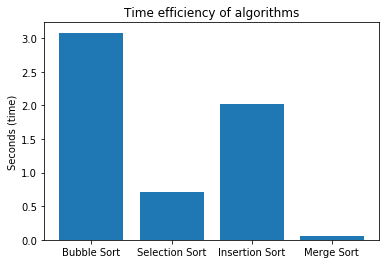

In [13]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

sorts = ('Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort')
y_pos = np.arange(len(sorts))
performance = [bubble_sort_tot_time, selection_tot_time, insertion_tot_time, tot_time]

plt.bar(y_pos, performance)
plt.xticks(y_pos, sorts)

plt.ylabel('Seconds (time)')

plt.title('Time efficiency of algorithms')
plt.show()

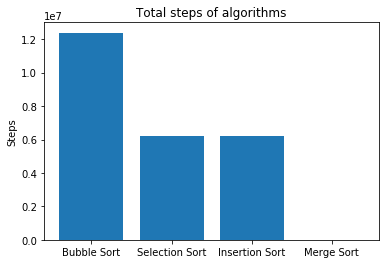

In [12]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

sorts = ('Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort')
performance = [bubble_sort_total_steps, selection_sort_total_steps, insertion_total_steps, step_counter]

plt.bar(y_pos, performance)
plt.xticks(y_pos, sorts)

plt.ylabel('Steps')

plt.title('Total steps of algorithms')
plt.show()

In both the cases, merge sort is the better one because it both takes the least amount of time to run and has the least amount of steps. Since, the answer we obtain from each of these three algorithms is the same, it is better to use merge sort. However, this choice may vary depending on the number of elements we need to sort. But, it looks like as the number of elements increases, merge sort performs better.